In [62]:
# To make debugging of logistic_regression module easier we enable imported modules autoreloading feature.
# By doing this you may change the code of logistic_regression library and all these changes will be available here.
%load_ext autoreload
%autoreload 2

# Add project root folder to module loading paths.
import sys
sys.path.append('../..')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Import Dependencies


In [63]:
# Import 3rd party dependencies.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Import custom logistic regression implementation.
from homemade.utils.metrics import Metrics
from homemade.utils.array import Array
from homemade.logistic_regression.logistic_regression import LogisticRegression

### Load the Data

In [64]:
# Load the data.
data = pd.read_csv('../../data/microchips-tests.csv')

# Print the data table.
data.head(10)

,param_1,param_2,validity
0,0.051267,0.699560,1
1,-0.092742,0.684940,1
2,-0.213710,0.692250,1
3,-0.375000,0.502190,1
4,-0.513250,0.465640,1
5,-0.524770,0.209800,1
6,-0.398040,0.034357,1
7,-0.305880,-0.192250,1
8,0.016705,-0.404240,1
9,0.131910,-0.513890,1


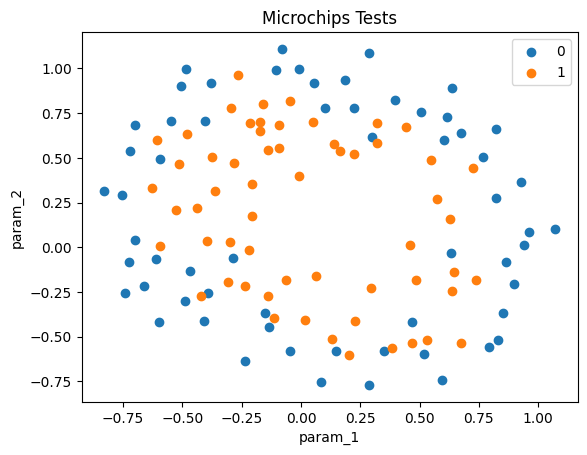

In [65]:
# Supported set of validities.
validities = [0, 1]

# Dataset parameters that we will take into account.
x_axis = 'param_1'
y_axis = 'param_2'

# Scatter the data on the plot for each validity class separatelly.
for validity in validities:
    plt.scatter(
        data[x_axis][data['validity'] == validity],
        data[y_axis][data['validity'] == validity],
        label=validity
    )

# Plot the data.    
plt.xlabel(x_axis)
plt.ylabel(y_axis)
plt.title('Microchips Tests')
plt.legend()
plt.show()

In [66]:

# Split data into features (X) và target (y)
X = data.drop('validity', axis=1)  # X is all columns except 'Target' column
y = data['validity']  # y is 'Target' column

# Divide into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
# prepare data for training
X_train = Array(x_train.values.tolist())
Y_train = Array(y_train.values.tolist())
X_test = Array(x_test.values.tolist())
Y_test = Array(y_test.values.tolist())

# Set up logistic regression parameters.
learning_rate = 0.01
iterations = 10000
# Init logistic regression instance.
logistic_regression = LogisticRegression(X_train, Y_train)

# Train logistic regression.
model_params = logistic_regression.train(learning_rate, iterations)


Model parameters after 0 iterations: Cost: 0.6931471805599458, slope: Array([0, 0]), intercept: 0
Optimization finished after 797 iterations.
Final parameters: Cost: 0.6807708155123965, slope: Array([-0.20047614996188637, 0.17788912694832856]), intercept: -0.03730879199927499


### Calculate Model Training f1 score


In [68]:
# predict with test set
y_predictions = logistic_regression.predict(X_test, model_params)

# calculate f1 score
f1_score = Metrics.f1_score(Y_test, y_predictions)
print(f1_score)

0.4


### Compare with logistic regression model of sklearn libray

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

# init and train model
model = LogisticRegression()
model.fit(x_train, y_train)

# predict trained model with test set
y_pred = model.predict(x_test)

# calculate f1 score
score = Metrics.f1_score(Y_test, y_predictions)
print(score)

0.4
